In [1]:
import numpy
import pandas
from matplotlib import pyplot
from scipy.stats import norm, binom
import math

In [29]:
n = 5000
x_axis_values = numpy.arange(n)

def calculate_mu_sigma_bpd(p, n):
    mu = n*p
    sigma = math.sqrt(n*p*(1-p))
    pmf = binom.pmf(x_axis_values,n, p)
    return mu, sigma, pmf

ad_a_p  = 8/1000
ad_a_mu, ad_a_sigma, ad_a_pmf = calculate_mu_sigma_bpd(ad_a_p, n)    
ad_b_p  = 4/1000
ad_b_mu, ad_b_sigma, ad_b_pmf = calculate_mu_sigma_bpd(ad_b_p, n)
ad_c_p  = 1/10000
ad_c_mu, ad_c_sigma, ad_c_pmf = calculate_mu_sigma_bpd(ad_c_p, n)

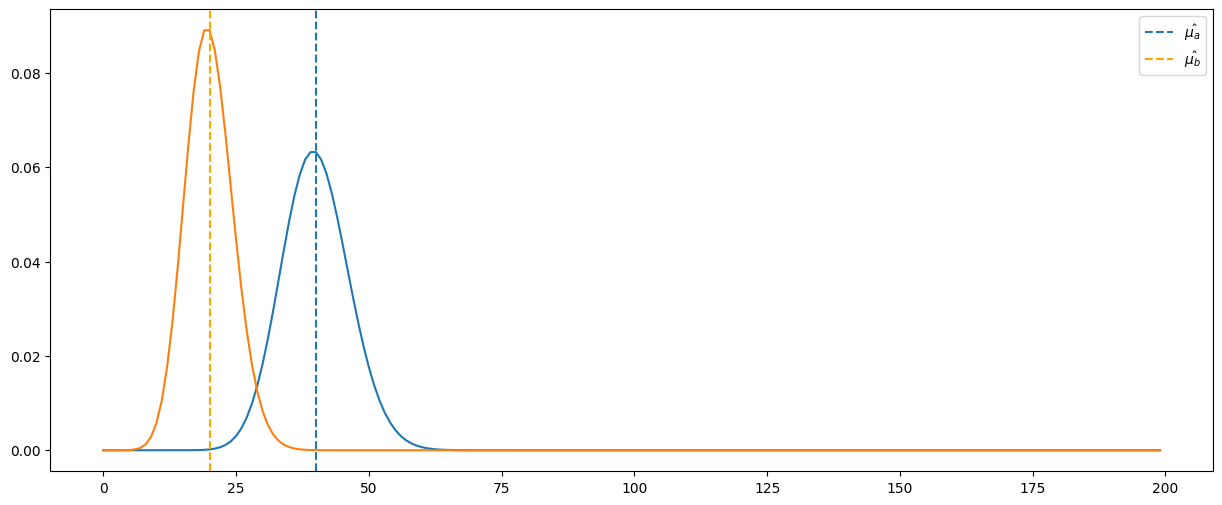

In [30]:
pyplot.figure(figsize=(15,6))
n_min = 0
n_max = 200
pyplot.plot(x_axis_values[n_min:n_max], ad_a_pmf[n_min:n_max])
pyplot.plot(x_axis_values[n_min:n_max], ad_b_pmf[n_min:n_max])


pyplot.axvline(ad_a_mu, ls='--', label=r'$\hat{\mu_a}$')
pyplot.axvline(ad_b_mu, ls='--', label=r'$\hat{\mu_b}$', color='orange')
# pyplot.axvline(ad_c_mu, ls='--', label=r'$\hat{\mu_c}$', color='g')
# ci_b = norm.interval(0.90, loc=ad_b_mu, scale=ad_b_sigma)[1]
# pyplot.axvline(ci_b, ls='--', label=r'$CI_b}$', color='black')
pyplot.legend()

In [31]:
#np and (1-p)n >= 5
f'we need max of {5/ad_a_p} or {5/(1-ad_a_p)} samples'

'we need max of 625.0 or 5.040322580645161 samples'

In [32]:
f'we need max of {5/ad_b_p} or {5/(1-ad_b_p)} samples'

'we need max of 1250.0 or 5.020080321285141 samples'

"after 10k number of samples we can use z-test for statistical significance test"

We will perform difference of sample proportion hypothesis testing

In [33]:
p_com = (ad_a_mu + ad_b_mu) / (2 * n)
print('p_com', p_com)
z_value = (ad_a_p - ad_b_p) / math.sqrt(p_com * (1-p_com) * (2/n) )
print('z', z_value)
p_value =  1 - norm.cdf(z_value)
p_value # alpha 0.05

p_com 0.006
z 2.5897698962183533


0.004802005213759397

In [34]:
f"optimal reward expected is {ad_a_p * 3 * n}"

'optimal reward expected is 120.0'

In [35]:
f"actual reward is {ad_a_p * n + ad_b_p * n + ad_c_p * n / 3}"

'actual reward is 60.166666666666664'